Importing the dependencies 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis 

In [2]:
#loading the data from the csv file to a Pandas DataFrame
Insurance_dataset=pd.read_csv('/content/insurance.csv')

In [3]:
#first 5 rows of the dataframe 
Insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#number of rows and columns
Insurance_dataset.shape

(1338, 7)

In [5]:
#getting some information about the dataset
Insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features 

*   Gender
*   Smoker 
*   Region




In [6]:
#checking for the missing values 
Insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [7]:
#statistical Measures of the dataset
Insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-60853ef6ac99>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurance_dataset['age'])


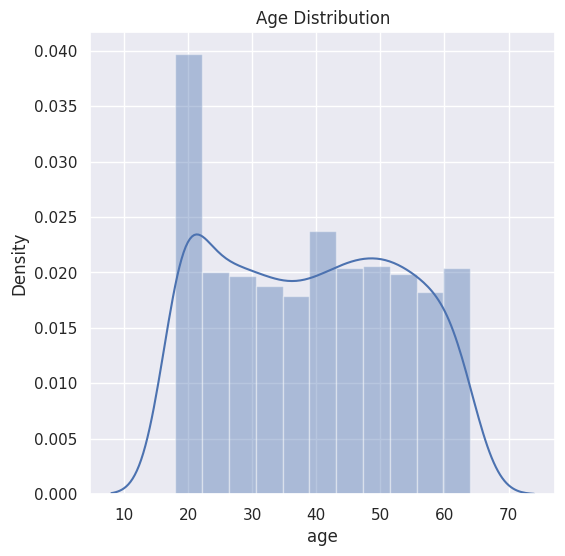

In [8]:
#distribution of age value 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(Insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

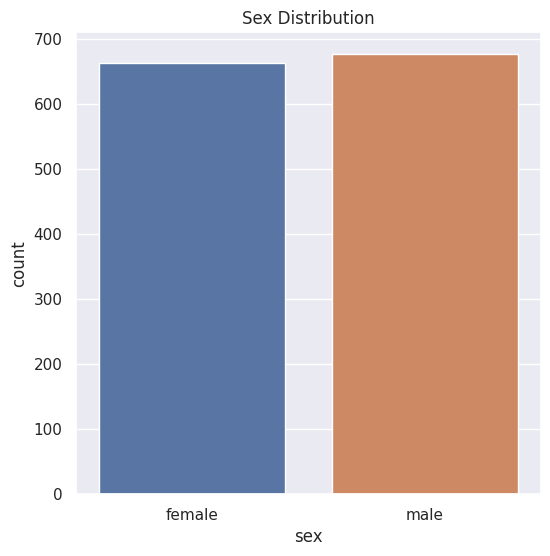

In [9]:
#Gender column 
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=Insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
Insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-11-e03ce689c3a8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurance_dataset['bmi'])


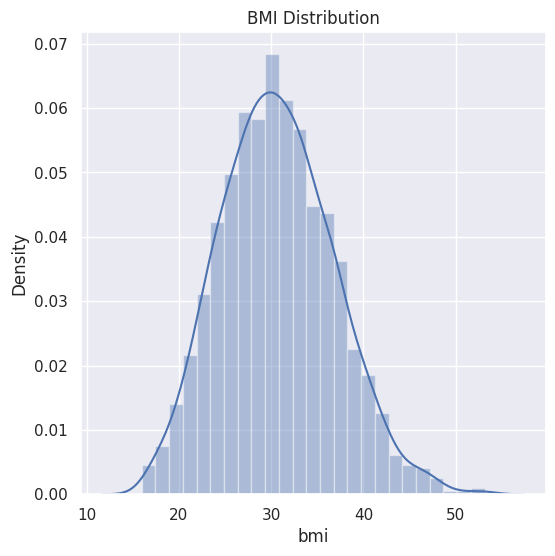

In [11]:
#bmi distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(Insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5-24.9

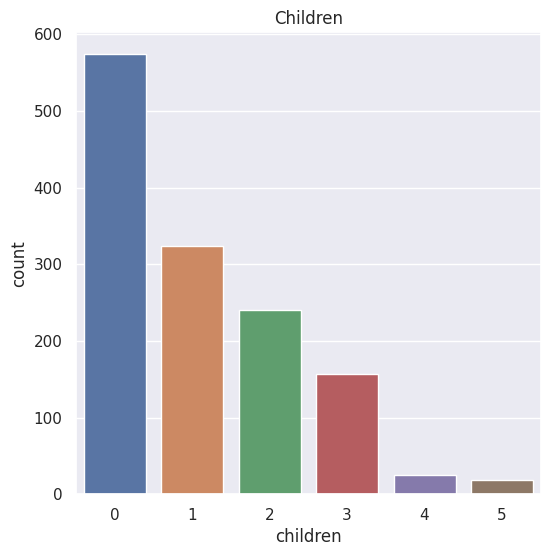

In [12]:
#children column 
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=Insurance_dataset)
plt.title('Children')
plt.show()

In [13]:
Insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

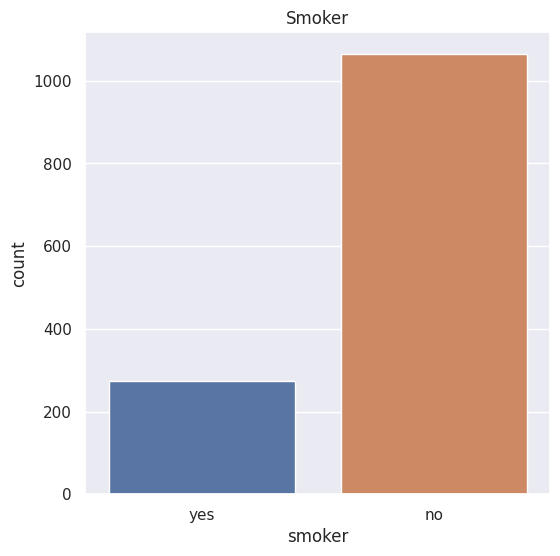

In [14]:
#smoker column 
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=Insurance_dataset)
plt.title('Smoker')
plt.show()

In [15]:
Insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

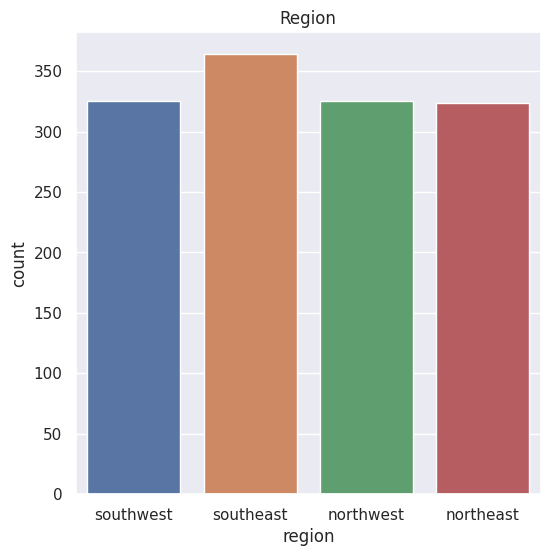

In [16]:
#region column 
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=Insurance_dataset)
plt.title('Region')
plt.show()

In [17]:
Insurance_dataset['region'].value_counts

<bound method IndexOpsMixin.value_counts of 0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object>

<ipython-input-18-44afc9cc57ea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurance_dataset['charges'])


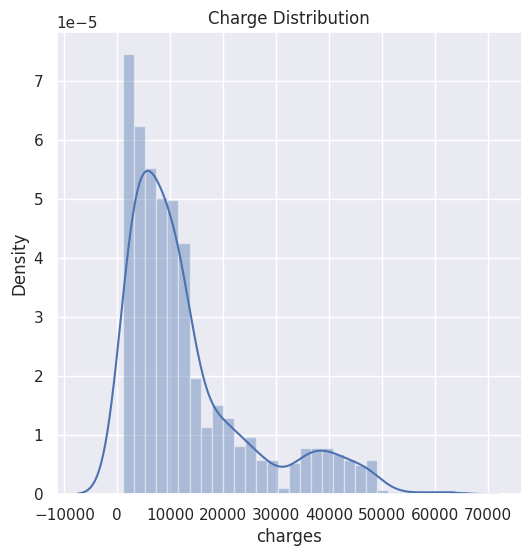

In [18]:
#charge distribution
plt.figure(figsize=(6,6))
sns.distplot(Insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

Analyzing the medical charges by age, bmi and children according to smoking factor 

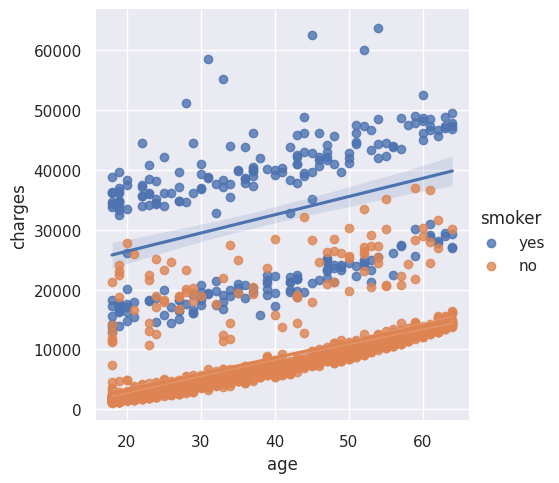

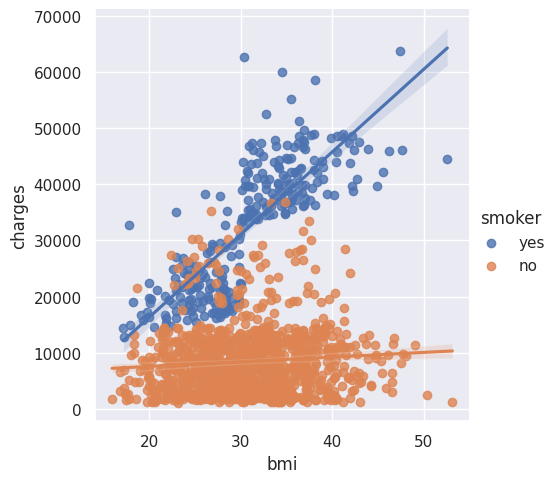

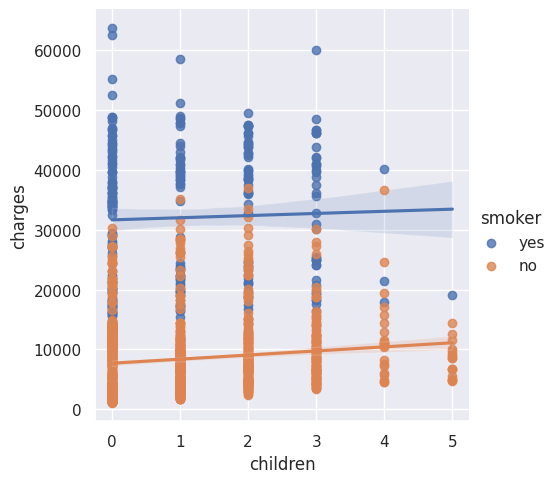

In [19]:
ax=sns.lmplot(x='age',y='charges',data=Insurance_dataset, hue='smoker')
ax=sns.lmplot(x='bmi',y='charges',data=Insurance_dataset, hue='smoker')
ax=sns.lmplot(x='children',y='charges',data=Insurance_dataset,hue='smoker')

Smoking has the highest impact on medical costs, though the costs are growing with age, bmi and children.The following violinplots shows too

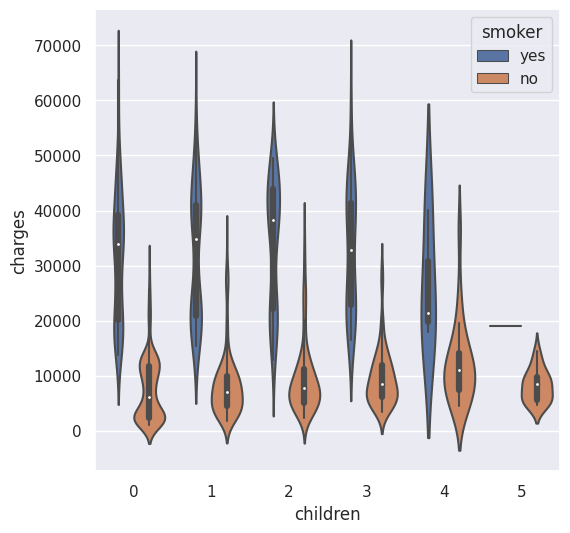

In [20]:
f,ax=plt.subplots(1,1, figsize=(6,6))
ax=sns.violinplot(x='children',y='charges',data=Insurance_dataset, orient='v',hue='smoker')

Encoding the categorical features

In [21]:
#encoding sex column
Insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

#encoding 'smoker' column
Insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#encoding 'region' column
Insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}} ,inplace=True)

In [22]:
#converting objects label into categorical
Insurance_dataset[['sex','smoker','region']]=Insurance_dataset[['sex','smoker','region']].astype('category')
Insurance_dataset.dtypes 

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

<ipython-input-23-6e76edc37df7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(Insurance_dataset.corr() ,annot=True)


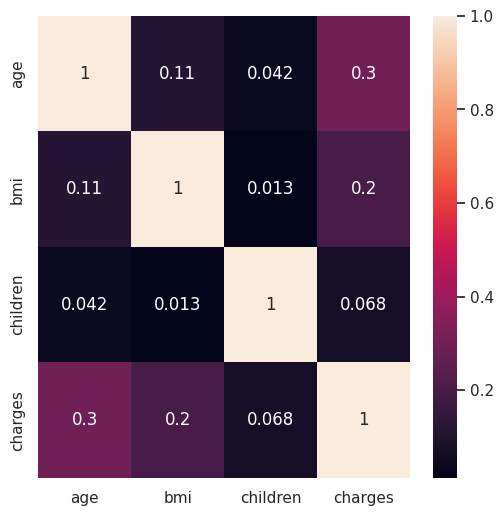

In [23]:
f, ax=plt.subplots(1,1, figsize=(6,6))
ax=sns.heatmap(Insurance_dataset.corr() ,annot=True)

Splitting the features and Target

In [24]:
X=Insurance_dataset.drop(columns='charges',axis=1)
Y=Insurance_dataset['charges']

In [25]:
print(X)

      age sex     bmi  children smoker region
0      19   1  27.900         0      0      1
1      18   0  33.770         1      1      0
2      28   0  33.000         3      1      0
3      33   0  22.705         0      1      3
4      32   0  28.880         0      1      3
...   ...  ..     ...       ...    ...    ...
1333   50   0  30.970         3      1      3
1334   18   1  31.920         0      1      2
1335   18   1  36.850         0      1      0
1336   21   1  25.800         0      1      1
1337   61   1  29.070         0      0      3

[1338 rows x 6 columns]


splitting the data into training data and testing data

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training-Linear Regression

In [28]:
#loading the linear regression model
regressor=LinearRegression()

In [29]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [30]:
#prediction on training dataset
training_data_prediction=regressor.predict(X_train)

In [31]:
#R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R squared value: ',r2_train)

R squared value:  0.751505643411174


In [32]:
test_data_prediction=regressor.predict(X_test)

In [33]:
#R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value: ',r2_test)

R squared value:  0.7447273869684076


Building a Predictive System

In [34]:
input_data=(31,1,25.74,0,1,0)

#changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)
print(prediction)

print('The insuarance cost is USD',prediction[0])

[3760.0805765]
The insuarance cost is USD 3760.080576496057


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Ridge Regression

In [35]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = Insurance_dataset.drop(['charges'], axis = 1)
y = Insurance_dataset['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

10910.362383835349
[ 2.54257019e+02  1.11290912e+01  3.34493926e+02  4.31796806e+02
 -2.36218658e+04  2.71181618e+02]
0.7989875396812892


In [40]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

10866.784535355704
[ 2.54163612e+02  8.38994705e+00  3.34352941e+02  4.32283689e+02
 -2.35536869e+04  2.69926239e+02]
0.7988149074016606


Lasso Regression

In [42]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

10910.77682693269
[ 2.54256322e+02  1.02720947e+01  3.34475513e+02  4.31662213e+02
 -2.36205642e+04  2.70988627e+02]
0.7989822585891742


Random Forest Regressor 

In [48]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = Insurance_dataset.drop(['charges'], axis=1)
y = Insurance_dataset.charges
Rfr = rfr(n_estimators = 100, criterion = 'friedman_mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
        metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred),
       metrics.r2_score(y_test,x_test_pred)))

MSE train data: 3605418.579, MSE test data: 18688970.551
R2 train data: 0.975, R2 test data: 0.883


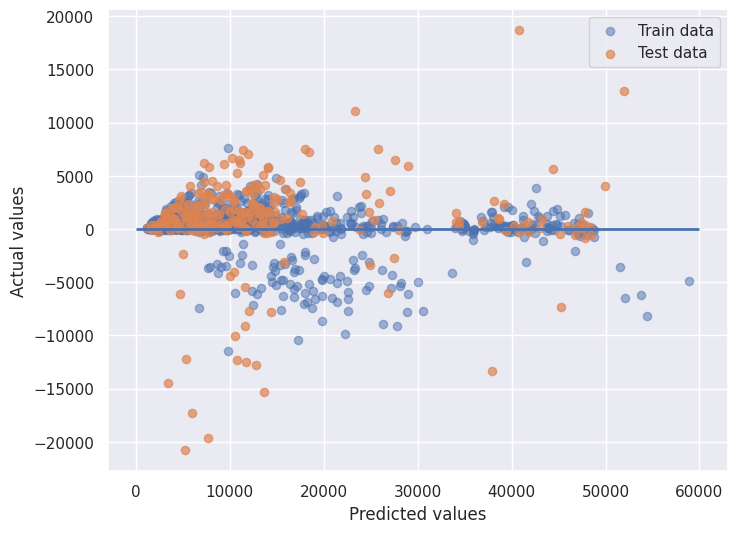

In [49]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train, marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test, marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, )

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218982)
3.age(0.136739)
4.children(0.020270)
5.region(0.016364)
6.sex(0.005966)


<BarContainer object of 6 artists>

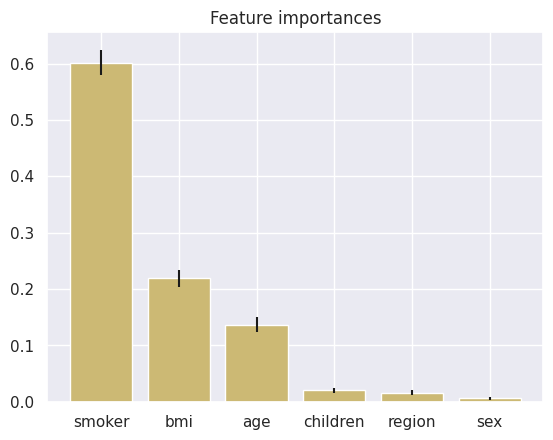

In [50]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]] 
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

#plot the features of forest 
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

Polynomial Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures
x = Insurance_dataset.drop(['charges', 'sex', 'region'], axis = 1)
y = Insurance_dataset.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-24379.85112702255
[ 0.00000000e+00 -3.59521612e+01  1.93210872e+03  4.05873171e+02
  9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
 -4.20849790e+00 -9.38983382e+00  3.81612289e+00 -1.40840670e+03
 -1.45982790e+02  4.46151855e+02  9.52698471e+03]
0.881259570334523


In [53]:
#Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776604
Mean Squared Error: 18895160.09878036
Root Mean Squared Error: 4346.856346692442


In [54]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
Insurance_dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
Insurance_dataset

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
